In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [189]:
df = pd.read_csv("traffic_accidents.csv")
df.head(5)

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [190]:
df.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [191]:
df = df.drop([
    'crash_date', 'trafficway_type', 'alignment', 'injuries_incapacitating',
    'injuries_non_incapacitating', 'injuries_reported_not_evident',
    'injuries_no_indication', 'first_crash_type', 'intersection_related_i'], axis=1)
df.head(5)

,traffic_control_device,weather_condition,lighting_condition,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,num_units,most_severe_injury,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,crash_month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,14,7,8


In [192]:
df = df.rename(columns={'traffic_control_device': 'Traffic Device',
          'weather_condition': 'Weather Condition',
          'lighting_condition': 'Light on Road',
          'roadway_surface_cond': 'Road Condition',
          'road_defect': 'Road Defect',
          'crash_type': 'Crash Type',
          'damage': 'Damage',
          'prim_contributory_cause': 'Primary Cause',
          'num_units': 'Number of Units',
          'most_severe_injury': 'Worst Injury',
          'injuries_total': "Injuries",
          'injuries_fatal': 'Fatal Injuries',
          'crash_hour': 'Crash Hour',
          'crash_day_of_week': 'Crash Day',
          'crash_month': 'Crash Month'
          })
df.head(5)

,Traffic Device,Weather Condition,Light on Road,Road Condition,Road Defect,Crash Type,Damage,Primary Cause,Number of Units,Worst Injury,Injuries,Fatal Injuries,Crash Hour,Crash Day,Crash Month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,14,7,8


In [193]:
df.isnull().sum()

Traffic Device       0
Weather Condition    0
Light on Road        0
Road Condition       0
Road Defect          0
Crash Type           0
Damage               0
Primary Cause        0
Number of Units      0
Worst Injury         0
Injuries             0
Fatal Injuries       0
Crash Hour           0
Crash Day            0
Crash Month          0
dtype: int64

In [194]:
df.drop_duplicates()
df.head(5)

,Traffic Device,Weather Condition,Light on Road,Road Condition,Road Defect,Crash Type,Damage,Primary Cause,Number of Units,Worst Injury,Injuries,Fatal Injuries,Crash Hour,Crash Day,Crash Month
0,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,2,NO INDICATION OF INJURY,0.0,0.0,13,7,7
1,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,NO INDICATION OF INJURY,0.0,0.0,0,1,8
2,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,3,NO INDICATION OF INJURY,0.0,0.0,10,5,12
3,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8
4,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2,NO INDICATION OF INJURY,0.0,0.0,14,7,8


<Axes: xlabel='Injuries'>

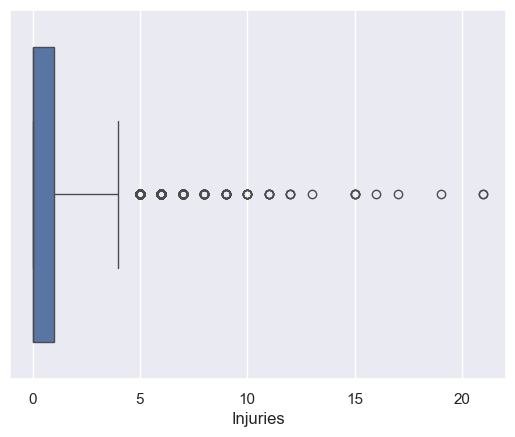

In [195]:
whis = 3
df['Injuries'].value_counts()
sns.boxplot(x=df['Injuries'], whis=whis)


Number of Units    2.0
Injuries           0.0
Fatal Injuries     0.0
Crash Hour         9.0
Crash Day          2.0
Crash Month        4.0
Name: 0.25, dtype: float64


<Axes: xlabel='Injuries'>

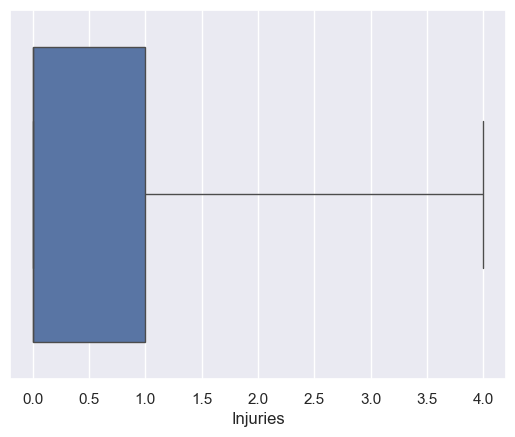

In [199]:
Q1 = df['Injuries'].quantile(0.25)
Q3 = df['Injuries'].quantile(0.75)
IQR = Q3 - Q1
df = df[((df['Injuries'] >= Q1 - whis * IQR) & (df['Injuries'] <= Q3 + whis * IQR))]
sns.boxplot(x=df['Injuries'], whis=whis)